## Period vs. Angle Plot of a Simple Pendulum

Pendulum: a 7cm-lock hanging on a 30cm-string. The lock is heavier at the bottom.

Measure the time the lock takes to swing 20 periods. Rounded the time to the nearest integer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


In [2]:
theta_initial = np.array([
    -90, -70, -50, -30, -10, 10, 30, 50, 70, 90
], dtype=np.float64) * np.pi / 180  # in radians
period_measured_raw = np.array([
    [25.4, 24.8, 24.1, 24.0, 23.7, 23.8, 24.1, 24.8, 25.0, 25.7],
    [25.6, 24.9, 24.7, 24.3, 24.0, 24.0, 24.0, 24.6, 25.2, 25.8],
    [25.7, 25.2, 24.7, 24.6, 24.1, 23.9, 24.4, 24.7, 25.0, 26.0]
]) / 20.0  # in seconds
# theta_uncertainty = np.pi / 60
theta_uncertainty = None
period_measured = period_measured_raw.mean(axis=0)
# period_measured = np.median(period_measured_raw, axis=0)
period_uncertainty = np.max(abs(period_measured_raw-period_measured), axis=0)
period_uncertainty += 0.1 / 20.0
# period_uncertainty = np.ones(len(period_measured)) * (0.1 / 20.0)


Theoretical period (with small angle approximation): $T=2\pi\sqrt{\frac{L}{g}}$

In [3]:
g = 9.80665
l0 = 0.35  # length of the pendulum, accounted for the size of the lock
period_theo = 2.0 * np.pi * (l0 / g)**0.5
print("The theoretical period is", period_theo, "seconds.")


The theoretical period is 1.1870077452509225 seconds.


Linear regression

In [4]:
def model(x, T0, b, c):
    return T0 * (1 + b * x + c * x**2)

popt, popv = scipy.optimize.curve_fit(
    model, theta_initial, period_measured,
    p0=(1.2, 0, 0), sigma=period_uncertainty)
print(popt, popv.diagonal()**0.5)

predicted = model(theta_initial, *popt)
residual = period_measured - predicted


[1.19815661 0.00332844 0.02976242] [0.00248491 0.00136942 0.001536  ]


Plot the graph

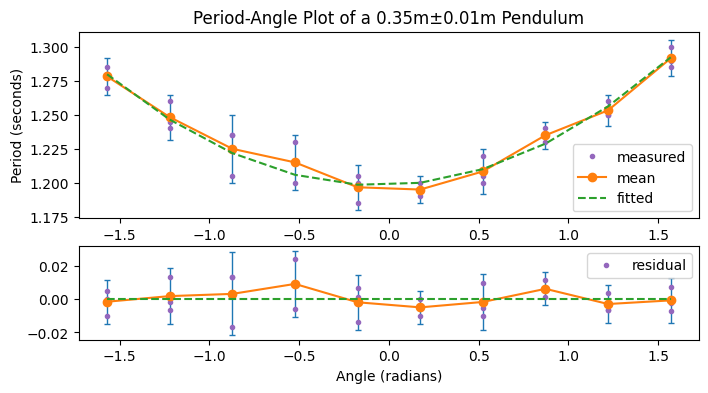

In [5]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, gridspec_kw={'height_ratios': [2, 1]},
    figsize=(8, 4))
ax1.set_title("Period-Angle Plot of a 0.35m±0.01m Pendulum")
ax2.set_xlabel("Angle (radians)")
ax1.set_ylabel("Period (seconds)")

ax1.errorbar(theta_initial, period_measured,
             xerr=theta_uncertainty, yerr=period_uncertainty,
             fmt=' ', linewidth=1, capsize=2)
ax1.plot(theta_initial.tolist()*3, period_measured_raw.flatten(),
         'oC4', markersize=3)
ax1.plot(theta_initial, period_measured, 'o-')
ax1.plot(theta_initial, predicted, '--')
# ax1.plot(theta_initial, period_theo_2, '-')
# ax1.legend(["measured", "fitted", "theoretical"])
ax1.legend(["measured", "mean", "fitted"])

ax2.errorbar(theta_initial, residual,
             xerr=theta_uncertainty, yerr=period_uncertainty,
             fmt=' ', linewidth=1, capsize=2)
ax2.plot(theta_initial.tolist()*3,
         (period_measured_raw - predicted).flatten(),
         'oC4', markersize=3)
ax2.legend(["residual"])
ax2.plot(theta_initial, residual, 'o-')
ax2.plot(theta_initial, np.zeros(len(theta_initial)), '--')

plt.show()
